<img src="https://i.imgur.com/nTOFzVI.png" alt="drawing" width="400"/>

# by One Fourth Labs

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

# Dealing with missing data

## Numpy

In [ ]:
x = np.array([1, 2, 3, 4, 5])

In [ ]:
x.sum()

15

In [ ]:
print(x.dtype)

int64


In [ ]:
x = np.array([1, 2, 3, '--', 5])

In [ ]:
print(x.dtype)

<U21


In [ ]:
x.sum()

TypeError: ignored

In [ ]:
x = np.array([1, 2, 3, None, 5])

In [ ]:
x.sum()

TypeError: ignored

In [ ]:
x = np.array([1, 2, 3, np.nan, 5])

In [ ]:
x.sum()

TypeError: ignored

In [ ]:
1 * np.nan

nan

In [ ]:
x_b = np.array([True, True, True, False, True])

In [ ]:
x[x_b]

array([1, 2, 3, 5], dtype=object)

In [ ]:
x[x_b].mean()

2.75

In [ ]:
m_x = np.ma.masked_array(x, mask = [0, 0, 0, 1, 0])

In [ ]:
m_x.mean()

2.75

## Dealing with missing data with Pandas

In [ ]:
df = pd.read_csv("rooms.csv")

In [ ]:
df.head()

,Room_Number,Num_Students,Department,Occupied
0,101.0,1,Mechanical,Y
1,102.0,NaN,Empty,N
2,103.0,3,Electrical,Y
3,104.0,2,Mechanical,Y
4,105.0,NaN,Chemical,N


In [ ]:
df.dtypes

Room_Number     float64
Num_Students     object
Department       object
Occupied         object
dtype: object

In [ ]:
%timeit np.arange(100000, dtype="int").sum()

1000 loops, best of 3: 264 µs per loop


In [ ]:
%timeit np.arange(100000, dtype="object").sum()

100 loops, best of 3: 6.49 ms per loop


In [ ]:
df.Room_Number.isnull()

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7    False
8    False
9    False
Name: Room_Number, dtype: bool

In [ ]:
df.Room_Number.isnull().sum()

1

In [ ]:
df.isnull()

,Room_Number,Num_Students,Department,Occupied
0,False,False,False,False
1,False,True,False,False
2,False,False,False,False
3,False,False,False,False
4,False,True,False,False
5,True,False,False,False
6,False,False,False,False
7,False,True,False,False
8,False,False,False,True
9,False,False,False,False


In [ ]:
df.isnull().sum()

Room_Number     1
Num_Students    3
Department      0
Occupied        1
dtype: int64

In [ ]:
missing_values = ["NA", "n/a", "na"]

In [ ]:
df = pd.read_csv("rooms.csv", 
                 na_values = missing_values)

In [ ]:
df.isnull()

,Room_Number,Num_Students,Department,Occupied
0,False,False,False,False
1,False,True,False,False
2,False,False,False,False
3,False,False,False,False
4,False,True,False,False
5,True,False,False,False
6,False,False,False,False
7,False,True,False,False
8,False,True,False,True
9,False,False,False,False


In [ ]:
df.Num_Students.mean()

2.0

In [ ]:
missing_values = ["NA", "n/a", "na", "Empty", "--"]

In [ ]:
df = pd.read_csv("rooms.csv", 
                 na_values = missing_values)

In [ ]:
df.isnull()

,Room_Number,Num_Students,Department,Occupied
0,False,False,False,False
1,False,True,True,False
2,False,False,False,False
3,False,False,False,False
4,False,True,False,False
5,True,False,False,False
6,False,False,False,True
7,False,True,False,False
8,False,True,False,True
9,False,False,False,False


In [ ]:
df.Department.unique()

array(['Mechanical', nan, 'Electrical', 'Chemical', 'Civil', 'CS'],
      dtype=object)

In [ ]:
df.Occupied.fillna("N", inplace=True)

In [ ]:
df

,Room_Number,Num_Students,Department,Occupied
0,101.0,1.0,Mechanical,Y
1,102.0,NaN,NaN,N
2,103.0,3.0,Electrical,Y
3,104.0,2.0,Mechanical,Y
4,105.0,NaN,Chemical,N
5,NaN,1.0,Electrical,Y
6,107.0,3.0,Civil,N
7,108.0,NaN,CS,Y
8,109.0,NaN,Mechanical,N
9,110.0,2.0,CS,N


In [ ]:
def convert_to_binary(v):
    if v == 'Y':
        return True
    else:
        return False

In [ ]:
df.Occupied = df.Occupied.apply(convert_to_binary)

In [ ]:
df

,Room_Number,Num_Students,Department,Occupied
0,101.0,1.0,Mechanical,True
1,102.0,NaN,NaN,False
2,103.0,3.0,Electrical,True
3,104.0,2.0,Mechanical,True
4,105.0,NaN,Chemical,False
5,NaN,1.0,Electrical,True
6,107.0,3.0,Civil,False
7,108.0,NaN,CS,True
8,109.0,NaN,Mechanical,False
9,110.0,2.0,CS,False


In [ ]:
df["Dept2"] = df.Department

In [ ]:
df.Department.fillna(method="pad", inplace=True)

In [ ]:
df

,Room_Number,Num_Students,Department,Occupied,Dept2
0,101.0,1.0,Mechanical,True,Mechanical
1,102.0,NaN,Mechanical,False,NaN
2,103.0,3.0,Electrical,True,Electrical
3,104.0,2.0,Mechanical,True,Mechanical
4,105.0,NaN,Chemical,False,Chemical
5,NaN,1.0,Electrical,True,Electrical
6,107.0,3.0,Civil,False,Civil
7,108.0,NaN,CS,True,CS
8,109.0,NaN,Mechanical,False,Mechanical
9,110.0,2.0,CS,False,CS


In [ ]:
df.Dept2.fillna(method="bfill", inplace=True)

In [ ]:
df

,Room_Number,Num_Students,Department,Occupied,Dept2
0,101.0,1.0,Mechanical,True,Mechanical
1,102.0,NaN,Mechanical,False,Electrical
2,103.0,3.0,Electrical,True,Electrical
3,104.0,2.0,Mechanical,True,Mechanical
4,105.0,NaN,Chemical,False,Chemical
5,NaN,1.0,Electrical,True,Electrical
6,107.0,3.0,Civil,False,Civil
7,108.0,NaN,CS,True,CS
8,109.0,NaN,Mechanical,False,Mechanical
9,110.0,2.0,CS,False,CS


In [ ]:
df.Num_Students.fillna(df.Num_Students.median(), inplace=True)

In [ ]:
df

,Room_Number,Num_Students,Department,Occupied,Dept2
0,101.0,1.0,Mechanical,True,Mechanical
1,102.0,2.0,Mechanical,False,Electrical
2,103.0,3.0,Electrical,True,Electrical
3,104.0,2.0,Mechanical,True,Mechanical
4,105.0,2.0,Chemical,False,Chemical
5,NaN,1.0,Electrical,True,Electrical
6,107.0,3.0,Civil,False,Civil
7,108.0,2.0,CS,True,CS
8,109.0,2.0,Mechanical,False,Mechanical
9,110.0,2.0,CS,False,CS


In [ ]:
df.Room_Number.interpolate(inplace=True)

In [ ]:
df

,Room_Number,Num_Students,Department,Occupied,Dept2
0,101.0,1.0,Mechanical,True,Mechanical
1,102.0,2.0,Mechanical,False,Electrical
2,103.0,3.0,Electrical,True,Electrical
3,104.0,2.0,Mechanical,True,Mechanical
4,105.0,2.0,Chemical,False,Chemical
5,106.0,1.0,Electrical,True,Electrical
6,107.0,3.0,Civil,False,Civil
7,108.0,2.0,CS,True,CS
8,109.0,2.0,Mechanical,False,Mechanical
9,110.0,2.0,CS,False,CS


# Open ended descriptive statistics

http://research.aspiringminds.com/resources/#datasets

In [ ]:
df = pd.read_excel("ameo_2015.xlsx")

In [ ]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [ ]:
df.shape

(3998, 38)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.dtypes

ID                                int64
Salary                            int64
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64


In [ ]:
df.Gender.unique()

array(['f', 'm'], dtype=object)

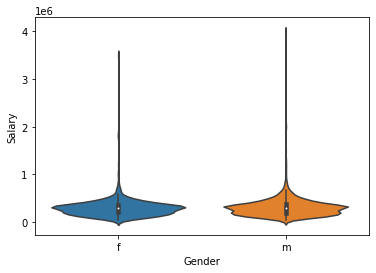

In [ ]:
sns.violinplot(x='Gender', y='Salary', data=df);

In [ ]:
df[['10percentage', '12percentage', 'collegeGPA', 'Gender']].groupby('Gender').mean()

,10percentage,12percentage,collegeGPA
Gender,,,
f,80.932894,77.007618,74.048056
m,76.979000,73.666636,70.679947


In [ ]:
df[['10percentage', '12percentage', 'collegeGPA', 'Gender']].groupby('Gender').median()

,10percentage,12percentage,collegeGPA
Gender,,,
f,82.4,77.0,74.00
m,78.0,73.4,70.66


In [ ]:
df[['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Gender']].groupby('Gender').mean()

,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Gender,,,,,
f,0.121034,0.292444,0.012173,-0.179358,0.038246
m,-0.087826,0.100566,-0.000198,-0.165783,-0.193609


In [ ]:
df[['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Gender']].groupby('Gender').median()

,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Gender,,,,,
f,0.2718,0.3789,0.0914,-0.23440,0.0973
m,-0.0154,0.2124,0.0914,-0.17277,-0.0943


In [ ]:
df[['Salary', 'Gender']].groupby('Gender').mean()

,Salary
Gender,
f,294937.304075
m,311716.211772


In [ ]:
th = df.Salary.mean()+df.Salary.std()

In [ ]:
df['HighIncome'] = (df.Salary > th)

In [ ]:
df.sample(10)

In [ ]:
df.head()

In [ ]:
df[['Salary', 'HighIncome', 'Gender']].groupby(['HighIncome', 'Gender']).mean()

Salary
HighIncome Gender               
False      f       271499.454744
           m       272598.433606
True       f       832250.000000
           m       785344.827586

In [ ]:
df[['Salary', 'HighIncome', 'Gender']].groupby(['HighIncome', 'Gender']).count()

Salary
HighIncome Gender        
False      f          917
           m         2809
True       f           40
           m          232

In [ ]:
print('Low income female percentage', 917/(2809+917)*100)

Low income female percentage 24.610842726784757


In [ ]:
print('High income female percentage', 40/(232+40)*100)

High income female percentage 14.705882352941178


In [ ]:
df.CollegeTier.unique()

array([2, 1])

In [ ]:
df[['CollegeTier', 'HighIncome', 'Salary']].groupby(['HighIncome', 'CollegeTier']).count()

Salary
HighIncome CollegeTier        
False      1               234
           2              3492
True       1                63
           2               209

In [ ]:
print('Low income college tier 2 percentage is', 3492/(3492+234)*100)

Low income college tier 2 percentage is 93.71980676328504


In [ ]:
print('High income college tier 2 percentage is', 209/(209+63)*100)

High income college tier 2 percentage is 76.83823529411765


In [ ]:
df[['Gender', 'CollegeTier', 'Salary']].groupby(['CollegeTier', 'Gender']).count()

Salary
CollegeTier Gender        
1           f           51
            m          246
2           f          906
            m         2795

In [ ]:
print('In college tier 1 female percentage is', 51/(246+51)*100)

In college tier 1 female percentage is 17.17171717171717


In [ ]:
print('In college tier 2 female percentage is', 906/(906+2795)*100)

In college tier 2 female percentage is 24.479870305322883


## Agriculture example

In [ ]:
df = pd.read_csv('apy.csv', na_values="=")

In [ ]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [ ]:
df.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [ ]:
df.Crop_Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015])

In [ ]:
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [ ]:
df.Season.unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [ ]:
df.Crop.unique()

In [ ]:
pd.to_numeric(df.Production)

ValueError: ignored

In [ ]:
df.Production.isnull().sum()

3727

In [ ]:
df.shape

(246091, 7)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(242364, 7)

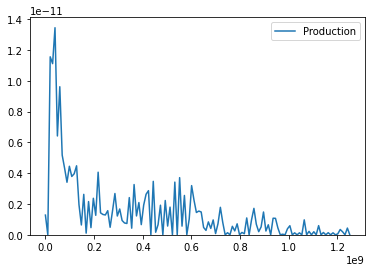

In [ ]:
sns.kdeplot(df.Production)

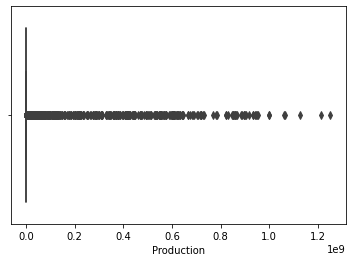

In [ ]:
sns.boxplot(df.Production)

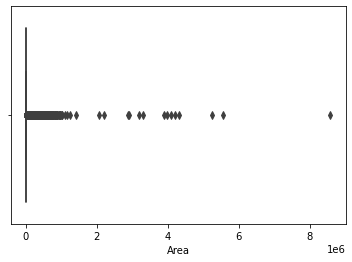

In [ ]:
sns.boxplot(df.Area)

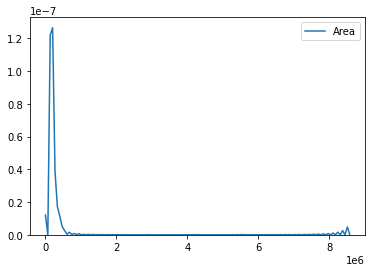

In [ ]:
sns.kdeplot(df.Area)

In [ ]:
df[df.State_Name == "Karnataka"]['District_Name'].unique()

array(['BAGALKOT', 'BANGALORE RURAL', 'BELGAUM', 'BELLARY',
       'BENGALURU URBAN', 'BIDAR', 'BIJAPUR', 'CHAMARAJANAGAR',
       'CHIKBALLAPUR', 'CHIKMAGALUR', 'CHITRADURGA', 'DAKSHIN KANNAD',
       'DAVANGERE', 'DHARWAD', 'GADAG', 'GULBARGA', 'HASSAN', 'HAVERI',
       'KODAGU', 'KOLAR', 'KOPPAL', 'MANDYA', 'MYSORE', 'RAICHUR',
       'RAMANAGARA', 'SHIMOGA', 'TUMKUR', 'UDUPI', 'UTTAR KANNAD',
       'YADGIR'], dtype=object)

In [ ]:
df.groupby(['State_Name', 'Crop', 'Crop_Year']).sum()

Area  Production
State_Name                  Crop     Crop_Year                       
Andaman and Nicobar Islands Arecanut 2000         4354.00     7200.00
                                     2001         4354.00     7300.00
                                     2002         4363.00     7350.00
                                     2003         4379.00     6707.00
                                     2004         4425.37     4781.05
...                                                   ...         ...
West Bengal                 Wheat    2010       316808.00   874415.00
                                     2011       315659.00   872895.00
                                     2012       321572.00   895927.00
                                     2013       331481.00   927837.00
                                     2014       334640.00   939254.00

[12896 rows x 2 columns]

In [ ]:
df[df.State_Name == "West Bengal"]['Crop'].unique()

array(['Rice', 'Jute', 'Mesta', 'Urad', 'Gram', 'Khesari', 'Masoor',
       'Moong(Green Gram)', 'Oilseeds total', 'Wheat', 'Arecanut',
       'Arhar/Tur', 'Coconut ', 'Dry chillies', 'Groundnut', 'Linseed',
       'Maize', 'Potato', 'Pulses total', 'Rapeseed &Mustard', 'Sesamum',
       'Sugarcane', 'Turmeric', 'Dry ginger', 'Sunflower',
       'Peas & beans (Pulses)', 'Cotton(lint)', 'Safflower', 'Garlic',
       'Barley', 'Bajra', 'Horse-gram', 'Other Kharif pulses', 'Soyabean',
       'Jowar', 'Niger seed', 'Sannhamp', 'Small millets', 'Tobacco',
       'Ragi', 'Other  Rabi pulses', 'Cardamom', 'Castor seed', 'Moth'],
      dtype=object)

In [ ]:
df.groupby(['State_Name', 'Crop_Year']).sum()

Area   Production
State_Name                  Crop_Year                         
Andaman and Nicobar Islands 2000         44518.00  89060914.00
                            2001         41163.00  89718700.00
                            2002         45231.40  94387137.67
                            2003         44799.40  95296454.67
                            2004         45308.77  87186497.63
...                                           ...          ...
West Bengal                 2010       7246875.00  38308645.00
                            2011       7755360.00  36777774.00
                            2012       7850936.00  38918275.00
                            2013       7999815.00  37901281.00
                            2014       8058390.00  43584403.00

[519 rows x 2 columns]

In [ ]:
df_ = df.groupby(['State_Name', 'Crop_Year']).sum()

In [ ]:
df_.reset_index(inplace=True)

In [ ]:
df_.head()

,State_Name,Crop_Year,Area,Production
0,Andaman and Nicobar Islands,2000,44518.00,89060914.00
1,Andaman and Nicobar Islands,2001,41163.00,89718700.00
2,Andaman and Nicobar Islands,2002,45231.40,94387137.67
3,Andaman and Nicobar Islands,2003,44799.40,95296454.67
4,Andaman and Nicobar Islands,2004,45308.77,87186497.63


In [ ]:
df_[['State_Name', 'Crop_Year']].groupby('State_Name').count()

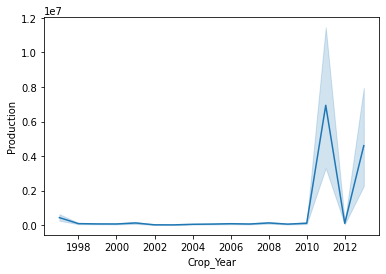

In [ ]:
sns.lineplot(x="Crop_Year", y="Production", data=df[df.State_Name == "Tamil Nadu"]);

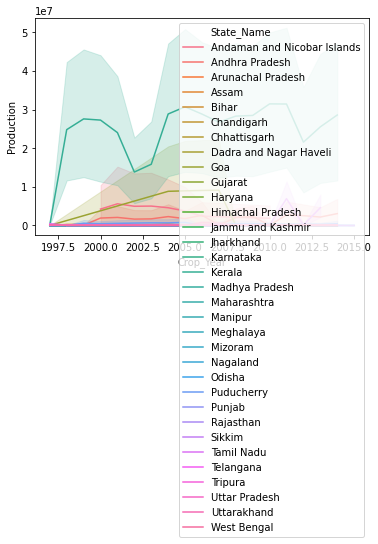

In [ ]:
sns.lineplot(x="Crop_Year", y="Production", data=df, hue="State_Name");

In [ ]:
!pip3 install plotly_express

In [ ]:
import plotly_express as px

In [ ]:
px.scatter(df_, x="Area", y="Production", animation_frame="Crop_Year", 
           animation_group="State_Name", color="State_Name")

In [ ]:
df_.sort_values('Crop_Year', inplace=True)

In [ ]:
df[(df.State_Name == "Kerala") & (df.Crop_Year == 2000)].sort_values('Production')

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
99868,Kerala,KOTTAYAM,2000,Kharif,Sesamum,6.0,1.0
100437,Kerala,MALAPPURAM,2000,Kharif,Ragi,4.0,3.0
99567,Kerala,KOLLAM,2000,Summer,Rice,4.0,4.0
98946,Kerala,KANNUR,2000,Kharif,Sesamum,10.0,6.0
98604,Kerala,IDUKKI,2000,Kharif,Ragi,8.0,7.0
...,...,...,...,...,...,...,...
101702,Kerala,THRISSUR,2000,Whole Year,Coconut,89472.0,540000000.0
98953,Kerala,KANNUR,2000,Whole Year,Coconut,96975.0,621000000.0
100445,Kerala,MALAPPURAM,2000,Whole Year,Coconut,110378.0,626000000.0
101425,Kerala,THIRUVANANTHAPURAM,2000,Whole Year,Coconut,88663.0,635000000.0


In [ ]:
df_ = df[df.Crop.isin(['Rice', 'Wheat', 'Maize', 'Ragi'])].groupby(['State_Name', 'Crop_Year']).sum()

In [ ]:
df_.head()

Area  Production
State_Name                  Crop_Year                      
Andaman and Nicobar Islands 2000       10881.00    32184.00
                            2001        9801.00    27333.00
                            2002       10885.00    32111.66
                            2003       10561.37    30850.87
                            2004       10734.92    29192.23

In [ ]:
df_.reset_index(inplace=True)

In [ ]:
df_.sort_values('Crop_Year', inplace=True)

In [ ]:
px.scatter(df_, x="Area", y="Production", animation_frame="Crop_Year", 
           animation_group="State_Name", color="State_Name")

In [ ]:
df_['Efficiency'] = df_['Production'] / df_['Area']

In [ ]:
px.scatter(df_, x="Area", y="Efficiency", size="Production", animation_frame="Crop_Year", 
           animation_group="State_Name", color="State_Name", range_y = [0.75, 5], range_x=[-1E6, 20E6])